## **A. Accuracy of (global and piecewise) interpolation**

In [ ]:
# import all the modules you need here, once and for all
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
## Lagrange interpolation
def lagrangeInterp(f,interval,n): #f function, interval tuple, n integer
  (a,b) = (interval[0],interval[1]) # represent bounds of the interval as a tuple
  m = (a+b)/2 # midpoint
  x = np.linspace(a, b, n+1) # create a linspace of n+1 nodes
  y_i = f(x) # function evaluations at the nodes
  coeffs = np.polyfit(x-m,y_i,n) # interpolation step
  return coeffs

In [ ]:
## THIS FUNCTION IS GIVEN TO STUDENTS

## Evaluate interpolant
#   Yq = EVALUATEINTERPOLANT(C, I, Xq, N), N=1, evaluates the Lagrange interpolant
#   defined by the coefficients C on the given interval I. C is a
#   row vector of length n+1 containing the polynomial coefficients in
#   descending powers,
#      Yq(i) = C(1)*(Xq(i)-M)^n + C(2)*(Xq(i)-M)^(n-1) +...+ C(n)*(Xq(i)-M) + C(n+1),
#   where M is the midpoint of the interval
#      M = (I(1) + I(2)) / 2
#
#   Yq = EVALUATEINTERPOLANT(Cs, Is, Xq, N) evaluates the piecewise Lagrange
#   interpolants defined by the coefficients Cs(i, :) on the interval Is(i, :)
#   with N subintervals.


def evaluateInterpolant(coeffs, intervals, xVals, N):
    import numpy as np
    fVals = np.zeros((np.size(xVals)))

    if N == 1:
        for i in range(np.size(coeffs)-1):
            m = (intervals[0] + intervals[1])/2
            fVals = np.polyval(coeffs, xVals-m)
    else:
        for k in range(N):
            coeff_int = coeffs[k,:]
            I_int = intervals[k,:]
            x_int = xVals[(I_int[0] <= xVals) & (xVals <= I_int[1])]
            m = (I_int[0] + I_int[1])/2
            y = np.polyval(coeff_int, x_int-m)
            fVals[(I_int[0] <= xVals) & (xVals <= I_int[1])] = y

    return fVals

Text(0, 0.5, 'f(x)')

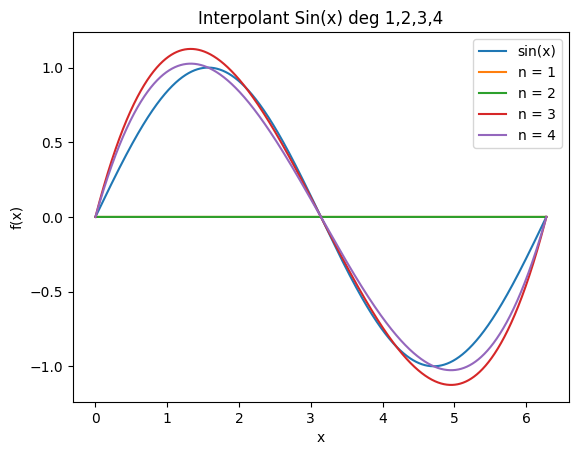

In [ ]:
f = [lagrangeInterp(np.sin,[0,2*np.pi],i) for i in range(1,5)] # a list of consecutive interpolants at n=1,2,3,4

x = np.linspace(0, 2*np.pi, 10001) # initialise linspace to evaluate on

f_i = [evaluateInterpolant(f[i],[0,2*np.pi],x,1) for i in range(4)] # list of consecutive evaluated interpolants

plt.plot(x,np.sin(x)) # plot sin(x)
for i in range(4): # plot each of the evaluated interpolants
  plt.plot(x,f_i[i])

plt.legend(['sin(x)','n = 1','n = 2','n = 3','n = 4']) # legend
plt.title("Interpolant Sin(x) deg 1,2,3,4") # title
plt.xlabel('x') # x label
plt.ylabel('f(x)') # y label

Text(0, 0.5, 'Error')

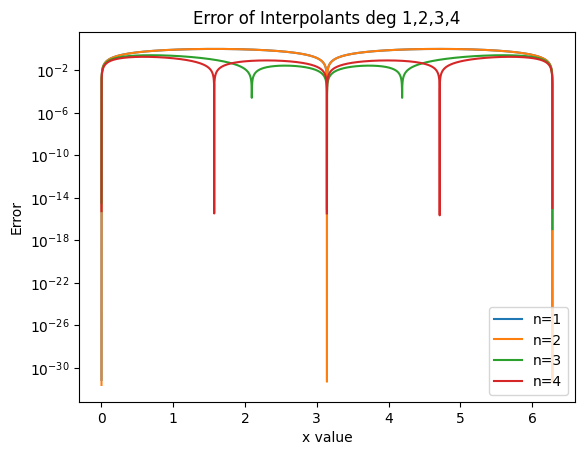

In [ ]:
e = [] # initialise the error list

for i in range(4): # with each iteration:
  e.append(abs(np.sin(x) - f_i[i])) # compute the real errror for this i
  plt.semilogy(x,e[i]) # plot the real error for this i
plt.legend(['n=1','n=2','n=3','n=4'],loc='lower right')
plt.title('Error of Interpolants deg 1,2,3,4')
plt.xlabel('x value')
plt.ylabel('Error')

In [ ]:
def dersin(n,x): # n ord of derivaive, x linspace
  if n%4 == 0:
    return np.sin(x)
  elif n%4 == 1:
    return np.cos(x)
  elif n%4 == 2:
    return -np.sin(x)
  else:
    return -np.cos(x)

Text(0, 0.5, 'Max Error')

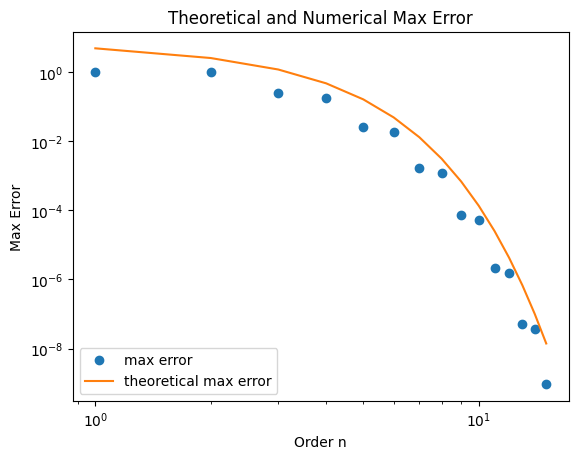

In [ ]:
e = [] # initialise error list
pnt = [] # initialise x values to plot

f = [lagrangeInterp(np.sin,[0,2*np.pi],i) for i in range(1,16)] # list of interpolants n=1,...,15
f_i = [evaluateInterpolant(f[i],[0,2*np.pi],x,1) for i in range(15)] # list of evaluated interpolants n=1,...,15

for i in range(15): # for each iteration:
  pnt.append(i+1) # append the n (of the interpolant) the pnt
  e.append(max(abs(np.sin(x) - f_i[i]))) # append the real error to e

plt.loglog(pnt,e,'o') # plot real error against the degree of interpolation

y = [] # initialise y list
for i in range(1,16): # for each iteration
  der = dersin(i+1,x) # call our derivative sin function for order i+1 on linspace x
  mx = max(der) # find the max of derivative
  y.append(mx/(4*(i+1))*((2*np.pi)/i)**(i+1)) # max der(sin) is always 1 for all derivatives from 0 to 2 pi

plt.loglog(pnt,y) # plot theoretical max error against the order of interpolation

plt.legend(['max error','theoretical max error'],loc='lower left')
plt.title('Theoretical and Numerical Max Error')
plt.xlabel('Order n')
plt.ylabel('Max Error')

In [ ]:
def piecewiseInterp(f,interval,n,N):
  if N > 1: # needed to avoid errors with subscripting when N=1
    (a,b) = (interval[0],interval[1]) # represent the interval as a tuple
    x = np.linspace(a, b, N+1) # initialise the points which will be boundaries of subintervals
    subIntervals = [[x[i],x[i+1]]for i in range(N)] # list of subintervals
    coeffs = [] # initialise coeffs
    for i in range(N): # for each iteration:
      a = lagrangeInterp(f,subIntervals[i],n) # run interpolation on a subinterval
      coeffs.append(a) # append the subinterval coefficients to the matrix of all coefficients
    return (np.array(coeffs),np.array(subIntervals)) # return as np.arrays
  else: # case when N=1, just langrangeInterp
    coeffs = lagrangeInterp(f,interval,n)
    return(coeffs,interval)

Text(0, 0.5, 'f(x)')

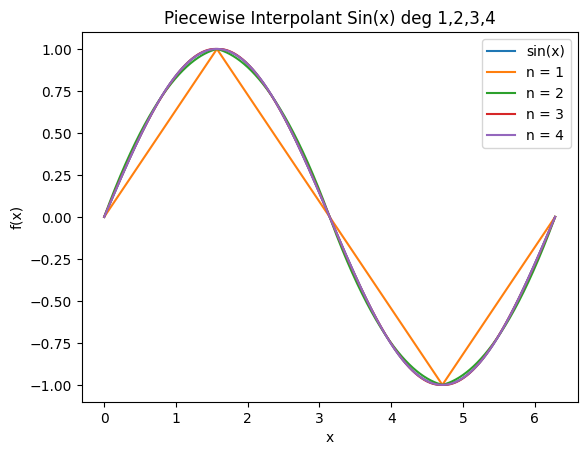

In [ ]:
f = [piecewiseInterp(np.sin,[0,2*np.pi],i,4) for i in range(1,5)] # list of consecutive piecewise interpolants N=1,2,3,4

x = np.linspace(0, 2*np.pi, 10001) # initalise linspace to be evaluating on
f_i = [evaluateInterpolant(f[i][0],f[i][1],x,4) for i in range(4)]  # list of evaluated interpolants

plt.plot(x,np.sin(x)) # plot sin
for i in range(4):
  plt.plot(x,f_i[i]) # plot each interpolant

plt.legend(['sin(x)','n = 1','n = 2','n = 3','n = 4'])
plt.title("Piecewise Interpolant Sin(x) deg 1,2,3,4")
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'Error')

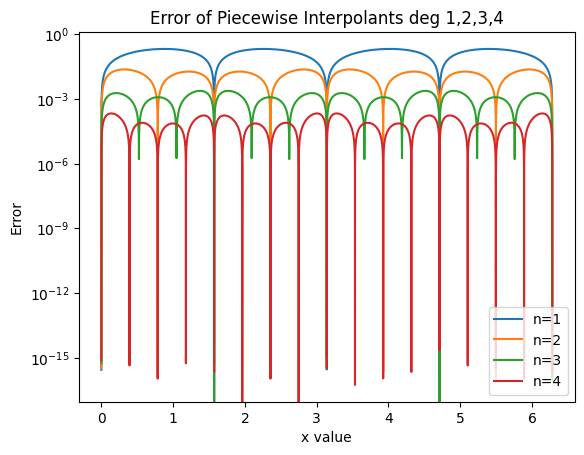

In [ ]:
e = [] # initialise error list

for i in range(4): # for each iteration:
  e.append(abs(np.sin(x) - f_i[i])) # append real error along all of x
  plt.semilogy(x,e[i]) # plot the error
plt.legend(['n=1','n=2','n=3','n=4'],loc='lower right')
plt.title('Error of Piecewise Interpolants deg 1,2,3,4')
plt.xlabel('x value')
plt.ylabel('Error')

<ipython-input-11-22af925184a4>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = np.array([[piecewiseInterp(np.sin,[0,2*np.pi],i,2**j) for j in range(11)]for i in range(1,5)])


Text(0, 0.5, 'Max Error')

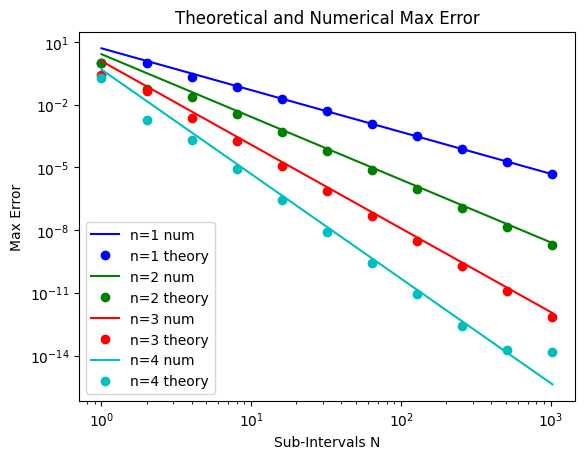

In [ ]:
col = ['b','g','r','c'] # initialise colour iterative for plotting consistency

f = np.array([[piecewiseInterp(np.sin,[0,2*np.pi],i,2**j) for j in range(11)]for i in range(1,5)])
# list of piecewise interpolant as an 4x11 array for 4 separate values of n, 11 separate values of N

f_i = np.array([[evaluateInterpolant(f[i][j][0],f[i][j][1],x,2**j) for j in range(11)]for i in range(4)])
# evaluations of each interpolant

e = np.zeros((4,11)) # initialise error array
pnt = [2**j for j in range(11)] # create x-value list for the plot

for i in range(4): # per each i iteration:
  for j in range(11): # per each j iteration:
    e[i][j] = max(abs(np.sin(x) - f_i[i][j])) # put max real error of i,j-th evaluated interpolation into the error array

y = [[] for i in range(4)] # initialise theoretical error array
mx =  1 # max of each derivative of sin is always 1

for i in range(4): # per each i iteration
  for j in range(11): # per each j iteration
    y[i].append(mx/(4*(i+2))*((2*np.pi)/((i+1)*(2**j)))**(i+2)) # formula 2, i starts at 0 not 1, so values of i are translated by +1
  plt.loglog(pnt,y[i],color=col[i]) # plot the theoeretical eq 2
  plt.loglog(pnt,e[i],'o',color=col[i]) # plot the real max error



plt.legend(['n=1 num','n=1 theory','n=2 num', 'n=2 theory','n=3 num','n=3 theory','n=4 num','n=4 theory'],loc='lower left')
plt.title('Theoretical and Numerical Max Error')
plt.xlabel('Sub-Intervals N')
plt.ylabel('Max Error')

In [ ]:
e = np.zeros((4,11))
pnt = np.zeros((4,11))

for i in range(4):
  for j in range(11):
    pnt[i][j] = (i+1)*(2**j)
    e[i][j] = max(abs(np.sin(x) - f_i[i][j]))

for i in range(4):
  plt.loglog(pnt[i],e[i])


e = []
pnt = []

g = [lagrangeInterp(np.sin,[0,2*np.pi],i) for i in range(1,21)]
g_i = [evaluateInterpolant(g[i],[0,2*np.pi],x,1) for i in range(20)]

for i in range(20):
  pnt.append(i+1)
  e.append(max(abs(np.sin(x) - g_i[i])))
plt.loglog(pnt,e)

plt.legend(['n=1 piecewise','n=2 piecewise','n=3 piecewise','n=4 piecewise','non-piecewise'],loc='lower left')
plt.title('Error compared to number of function evaluations')
plt.xlabel('number of points evaluated')
plt.ylabel('Max Error')

# **B. Stability of (global and piecewise) interpolation**

In [ ]:
def perturbed(x):
  return np.sin(x) + 0.001*np.cos(8*x)

In [ ]:
f = [0,0]
f[0] = lagrangeInterp(perturbed,[0,2*np.pi],4)
f[1] = lagrangeInterp(perturbed,[0,2*np.pi],20)



x = np.linspace(0, 2*np.pi, 10001) # initialise linspace to evaluate on

f_i = [evaluateInterpolant(f[i],[0,2*np.pi],x,1) for i in range(2)] # list of consecutive evaluated interpolants

plt.plot(x,np.sin(x)) # plot sin(x)
for i in range(2): # plot each of the evaluated interpolants
  plt.plot(x,f_i[i])

plt.legend(['sin(x)','perturbed n = 4','perturbed n = 20']) # legend
plt.title("Perturbed Interpolant Sin(x) deg 4,20") # title
plt.xlabel('x') # x label
plt.ylabel('f(x)') # y label

Text(0, 0.5, 'f(x)')

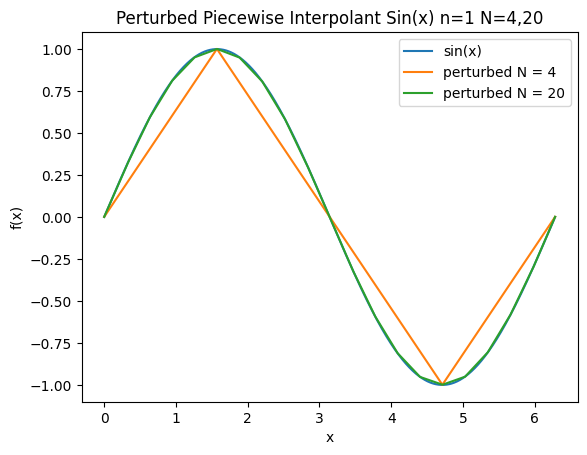

In [ ]:
f = [0,0]
f[0] = piecewiseInterp(perturbed,[0,2*np.pi],1,4)
f[1] = piecewiseInterp(perturbed,[0,2*np.pi],1,20)


x = np.linspace(0, 2*np.pi, 10001) # initialise linspace to evaluate on

f_i = [evaluateInterpolant(f[0][0],f[0][1],x,4), evaluateInterpolant(f[1][0],f[1][1],x,20)] # list of consecutive evaluated interpolants

plt.plot(x,np.sin(x)) # plot sin(x)
for i in range(2): # plot each of the evaluated interpolants
  plt.plot(x,f_i[i])

plt.legend(['sin(x)','perturbed N = 4','perturbed N = 20']) # legend
plt.title("Perturbed Piecewise Interpolant Sin(x) n=1 N=4,20") # title
plt.xlabel('x') # x label
plt.ylabel('f(x)') # y labe

Text(0, 0.5, 'Max Error')

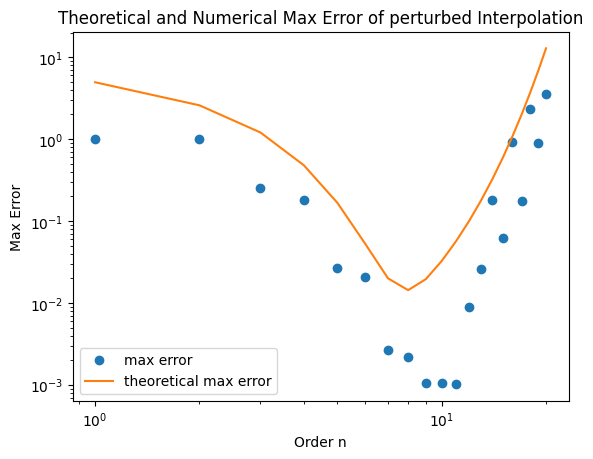

In [ ]:
e = [] # initialise error list
pnt = [] # initialise x values to plot

f = [lagrangeInterp(perturbed,[0,2*np.pi],i) for i in range(1,21)] # list of interpolants n=1,...,15
f_i = [evaluateInterpolant(f[i],[0,2*np.pi],x,1) for i in range(20)] # list of evaluated interpolants n=1,...,15

for i in range(20): # for each iteration:
  pnt.append(i+1) # append the n (of the interpolant) the pnt
  e.append(max(abs(np.sin(x) - f_i[i]))) # append the real error to e

plt.loglog(pnt,e,'o') # plot real error against the degree of interpolation

y = [] # initialise y list
for i in range(1,21): # for each iteration
  der = dersin(i+1,x) # call our derivative sin function for order i+1 on linspace x
  mx = max(der) # find the max of derivative

  lebesgue = (2**(i+1) / (np.e*i*np.log(i)+0.5772)) # Lebesgue constant
  y.append(mx/(4*(i+1))*((2*np.pi)/i)**(i+1) + lebesgue * 0.001) # max der(sin) is always 1 for all derivatives from 0 to 2 pi , max of the pertrubation will be max(cos)*0.001 which is just 0.001

plt.loglog(pnt,y) # plot theoretical max error against the order of interpolation

plt.legend(['max error','theoretical max error'],loc='lower left')
plt.title('Theoretical and Numerical Max Error of perturbed Interpolation')
plt.xlabel('Order n')
plt.ylabel('Max Error')

<ipython-input-17-6b6e20e42182>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = np.array([[piecewiseInterp(perturbed,[0,2*np.pi],i,2**j) for j in range(11)]for i in range(1,5)])


Text(0, 0.5, 'Max Error')

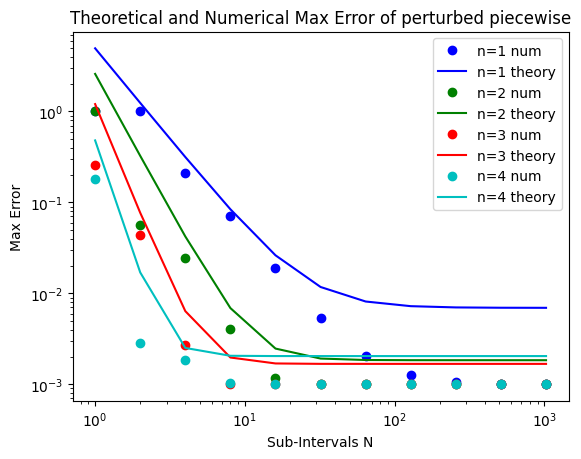

In [ ]:
f = np.array([[piecewiseInterp(perturbed,[0,2*np.pi],i,2**j) for j in range(11)]for i in range(1,5)])
# 4x11 array of piecewise interpolants on the perturbed function for n=1,2,3,4, N=2^0,2^1,...2^10

f_i = np.array([[evaluateInterpolant(f[i][j][0],f[i][j][1],x,2**j) for j in range(11)]for i in range(4)])
# 4x11 array of evaluated interpolants for the same parameters

col = ['b','g','r','c'] # list of colours for consistent plotting

e = np.zeros((4,11)) # initialise error array
pnt = [2**j for j in range(11)] # create the x value list

for i in range(4): # per each i iteration:
  for j in range(11): # per each j iteration
    e[i][j] = max(abs(np.sin(x) - f_i[i][j])) # substitute i,j-th real error


y = [[] for i in range(4)] # initialise the theoretical error list of lists
mx = 1 # max der(sin) is always 1 for all derivatives on 0 to 2 pi
for i in range(4): # per each i iteration:
  for j in range(11): # per each j iteration:
    lebesgue = (2**(i+2) / (np.e*(i+1)*np.log(i+1)+0.5772)) # Lebesgue constant
    y[i].append(mx/(4*(i+2))*((2*np.pi)/((i+1)*(2**(j))))**(i+2) + lebesgue*0.001) # append the theoretical bound of the error
  plt.loglog(pnt,e[i],'o',color=col[i]) # plot i-th real error
  plt.loglog(pnt,y[i],color=col[i]) # plot i-th theoretical bound error



plt.legend(['n=1 num','n=1 theory','n=2 num', 'n=2 theory','n=3 num','n=3 theory','n=4 num','n=4 theory'],loc='upper right')
plt.title('Theoretical and Numerical Max Error of perturbed piecewise')
plt.xlabel('Sub-Intervals N')
plt.ylabel('Max Error')

## **C. Integration**

In [ ]:
def compositeIntegr(f,interval,n,N):

  if N==1:
    a,b = interval[0],interval[1] # start and end point of interval
    m = (a+b) / 2
    coeffs = lagrangeInterp(f,interval,n) # the centered coefficients are the same so we can use our function frombefore
    integral = 0
    for i in range(n+1):
      integral += (coeffs[i] / (n+1-i)) * (b - m)**(n+1-i) - (coeffs[i] / (n+1-i)) * (a - m)**(n+1-i) # follows equation from lecture notes

  else: # for N>1
    x = piecewiseInterp(f,interval,n,N) # we need to get the piecewise coefficients for each sub-interval
    coeffs = x[0] # the coeffs and intervals are now in arrays
    intervals = x[1]
    integral = 0
    for i in range(N):
      (a,b) = (intervals[i][0] , intervals[i][1]) # we follow the same process for N=1 for each subinterval and it's related centred centred coefficients
      m = (a+b) / 2
      for j in range(n+1):
        integral += (coeffs[i][j] / (n+1-j)) * (b - m)**(n+1-j) - (coeffs[i][j] / (n+1-j)) * (a - m)**(n+1-j)
  return integral

In [ ]:
def trapezoidal(f,interval): # trapezoidal formula as a function
  a,b = interval[0],interval[1]
  trapz = ((f(a) + f(b)) / 2) * (b-a) # formula
  return trapz

def simpson (f,interval): # simpson's formula as a function
  a,b = interval[0],interval[1]
  simp = ((b-a)/6) * f(a) + ((b-a)/6) * f(b) + (2/3)*(b-a)*f((a+b)/2) # formula
  return simp

In [ ]:
def powZero(x):
  return x**0

def identity(x):
  return x

def square(x):
  return x**2

def cube(x):
  return x**3

def fourth(x):
  return x**4

def intPower(deg,interval):
  a,b = interval[0],interval[1]
  integral = b**(deg+1) / (deg+1) - a**(deg+1) / (deg+1)
  return integral

f = [powZero,identity,square,cube,fourth] # list so we can call the functions in an iterative process

In [ ]:
i = 0
x = np.linspace(0,1,1000)
e = 0
while e < 10**(-15):
  numeric = compositeIntegr(f[i],[0,1],3,1) # simpson formula
  theoretic = intPower(i,[0,1]) # approximated theoretical value
  e = abs(numeric - theoretic) # error
  i += 1 # add 1 to iteration

print('The degree of excactness of the Simpson`s equation is',i-2) # i-2 as when the test fails we need to subtract 1,
# also another -1 to account for the adding of 1 for continuous iteration


# same everything for trapezoidal
j = 0
e = 0
while e < 10**(-15):
  numeric = compositeIntegr(f[j],[0,1],1,1)
  theoretic = intPower(j,[0,1])
  e = abs(numeric-theoretic)
  j += 1

print('The degree of excactness of the Trapezoidal equation is',j-2)

The degree of excactness of the Simpson`s equation is 3
The degree of excactness of the Trapezoidal equation is 1


In [ ]:
def sin2(x):
  return np.sin(x)**2

Text(0, 0.5, 'Error')

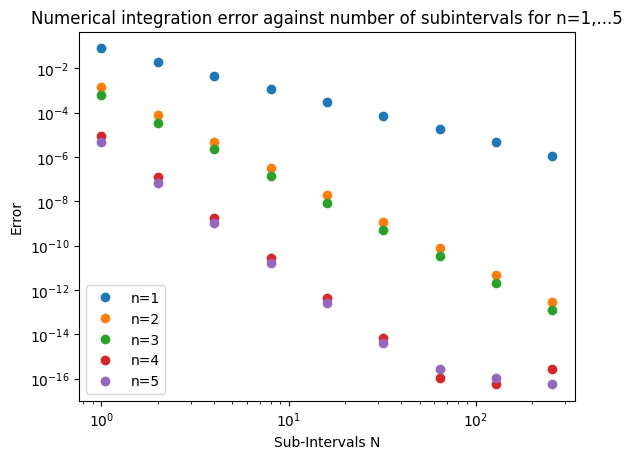

In [ ]:
integral = np.array([[compositeIntegr(sin2,[0,1],i,2**j) for j in range(9)] for i in range(1,6)])

e = np.zeros((5,9)) # initialise error array
pnt = [2**j for j in range(9)] # create the x value list
theoretical = (1-np.sin(1)*np.cos(1))/2 # theoretical value of the integral
for i in range(5):
  for j in range(9):
    e[i][j] = abs(theoretical - integral[i][j]) # input error value
  plt.loglog(pnt,e[i],'o') # plot sets of errors against N

plt.legend(['n=1','n=2','n=3', 'n=4','n=5'],loc='lower left')
plt.title('Numerical integration error against number of subintervals for n=1,...5')
plt.xlabel('Sub-Intervals N')
plt.ylabel('Error')